In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import library

### Baca File CSV

In [103]:
agsel = pd.read_csv('car_resale_prices.csv') 
agsel.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra


In [104]:
agsel.nunique()

Unnamed: 0           17446
full_name             6923
resale_price          1738
registered_year        243
engine_capacity        156
insurance                7
transmission_type        2
kms_driven            8285
owner_type               5
fuel_type                5
max_power              609
seats                    9
mileage                587
body_type               26
city                    13
dtype: int64

In [105]:
agsel.isna().sum()

Unnamed: 0             0
full_name              0
resale_price           0
registered_year       69
engine_capacity       14
insurance              7
transmission_type      0
kms_driven             3
owner_type            45
fuel_type              0
max_power            102
seats                 10
mileage              508
body_type              0
city                   0
dtype: int64

In [106]:
agsel.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17441    False
17442    False
17443    False
17444    False
17445    False
Length: 17446, dtype: bool

In [107]:
agsel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17446 non-null  int64  
 1   full_name          17446 non-null  object 
 2   resale_price       17446 non-null  object 
 3   registered_year    17377 non-null  object 
 4   engine_capacity    17432 non-null  object 
 5   insurance          17439 non-null  object 
 6   transmission_type  17446 non-null  object 
 7   kms_driven         17443 non-null  object 
 8   owner_type         17401 non-null  object 
 9   fuel_type          17446 non-null  object 
 10  max_power          17344 non-null  object 
 11  seats              17436 non-null  float64
 12  mileage            16938 non-null  object 
 13  body_type          17446 non-null  object 
 14  city               17446 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 2.0+ MB


### A1 Supervised Learning  

### Support Vector Machine

In [111]:
from sklearn.preprocessing import MinMaxScaler
nrm = MinMaxScaler()

In [123]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
agsel.owner_type = oe.fit_transform(agsel[['owner_type']])
agsel.fuel_type = oe.fit_transform(agsel[['fuel_type']])

In [124]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(sparse=False)

agsel.transmission_type = one_hot.fit_transform(agsel[["transmission_type"]])

c:\Users\AGSEL FALANA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


copy variabel

In [112]:
agsel2 = agsel

menghapus data null

In [113]:
agsel2.dropna(inplace=True)

In [114]:
agsel2.drop(columns=["engine_capacity", "city", "full_name", "resale_price"], inplace=True)
agsel2

,Unnamed: 0,registered_year,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type
0,0,2017,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback
1,1,2018,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV
2,2,2015,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan
3,3,2015,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan
4,4,2009,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback
...,...,...,...,...,...,...,...,...,...,...,...
17441,17441,Jul 2013,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18 kmpl,Sedan
17442,17442,Jun 2016,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16 kmpl,Sedan
17443,17443,Jun 2016,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28 kmpl,Sedan
17444,17444,Jun 2019,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01 kmpl,SUV


In [125]:
X = agsel[['owner_type','fuel_type']]
y = agsel.transmission_type

In [118]:
X.object = ord.fit_transform(X[['owner_type', 'fuel_type']])

C:\Users\AGSEL FALANA\AppData\Local\Temp\ipykernel_24440\2439860111.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.object = ord.fit_transform(X[['owner_type', 'fuel_type']])


In [126]:

columns = list(X.columns)
X[columns] = nrm.fit_transform(X[columns])

C:\Users\AGSEL FALANA\AppData\Local\Temp\ipykernel_24440\4025667800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columns] = nrm.fit_transform(X[columns])


In [127]:
agsel3 = pd.concat([X, y], axis=1)

c:\Users\AGSEL FALANA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AGSEL FALANA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AGSEL FALANA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AGSEL FALANA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: 

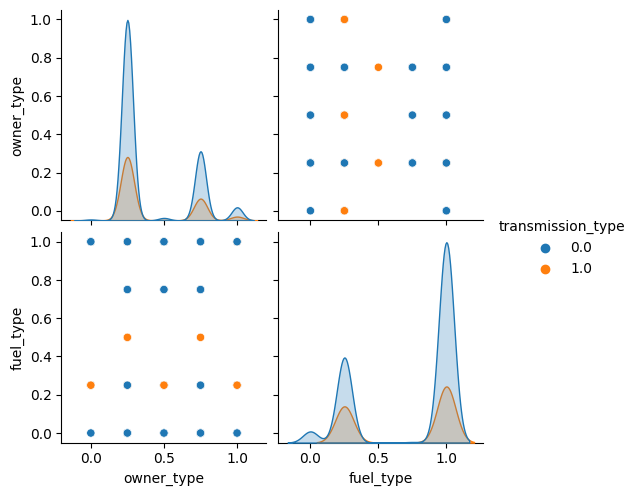

In [130]:
sns.pairplot(agsel3, hue="transmission_type", palette="tab10")
plt.show()

In [131]:
from sklearn.preprocessing import MinMaxScaler # untuk Normalisasi data
from sklearn.preprocessing import StandardScaler # untuk standarisasi data
import numpy as np 

mms = MinMaxScaler()
ss = StandardScaler()

normalisasiData = mms.fit_transform(agsel[['transmission_type']])
print(" Nilai scaling data : ", (normalisasiData))
standarisasiData = ss.fit_transform(agsel[['owner_type', 'fuel_type']])
print(" Nilai standar deviasi : ", np.std(standarisasiData))

 Nilai scaling data :  [[0.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]
 Nilai standar deviasi :  1.0


In [132]:
from sklearn.model_selection import train_test_split

X = agsel[["owner_type", "fuel_type"]]
Y = agsel["transmission_type"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [133]:
print("Dimensi X_train :", X_train.shape)
print("Dimensi X_test :", X_test.shape)
print("Dimensi Y_train :", y_train.shape)
print("Dimensi Y_test :", y_test.shape)

Dimensi X_train : (13433, 2)
Dimensi X_test : (3359, 2)
Dimensi Y_train : (13433,)
Dimensi Y_test : (3359,)


In [134]:
from sklearn.svm import SVC

svm = SVC(kernel = 'poly')
svm.fit(X_train, y_train)

SVC(kernel='poly')

In [135]:
y_pred = svm.predict(X_test)
sv = svm.support_vectors_

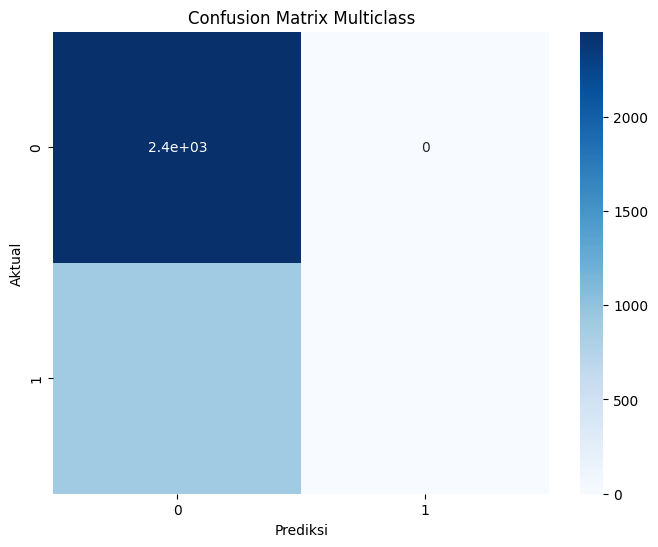

In [136]:
from sklearn.metrics import confusion_matrix

confussion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confussion, annot=True, cmap="Blues")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Multiclass')
plt.show()

In [137]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84      2450
         1.0       0.00      0.00      0.00       909

    accuracy                           0.73      3359
   macro avg       0.36      0.50      0.42      3359
weighted avg       0.53      0.73      0.62      3359



c:\Users\AGSEL FALANA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AGSEL FALANA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AGSEL FALANA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\AGSEL FALANA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AGSEL FALANA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AGSEL FALANA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AGSEL FALANA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: 

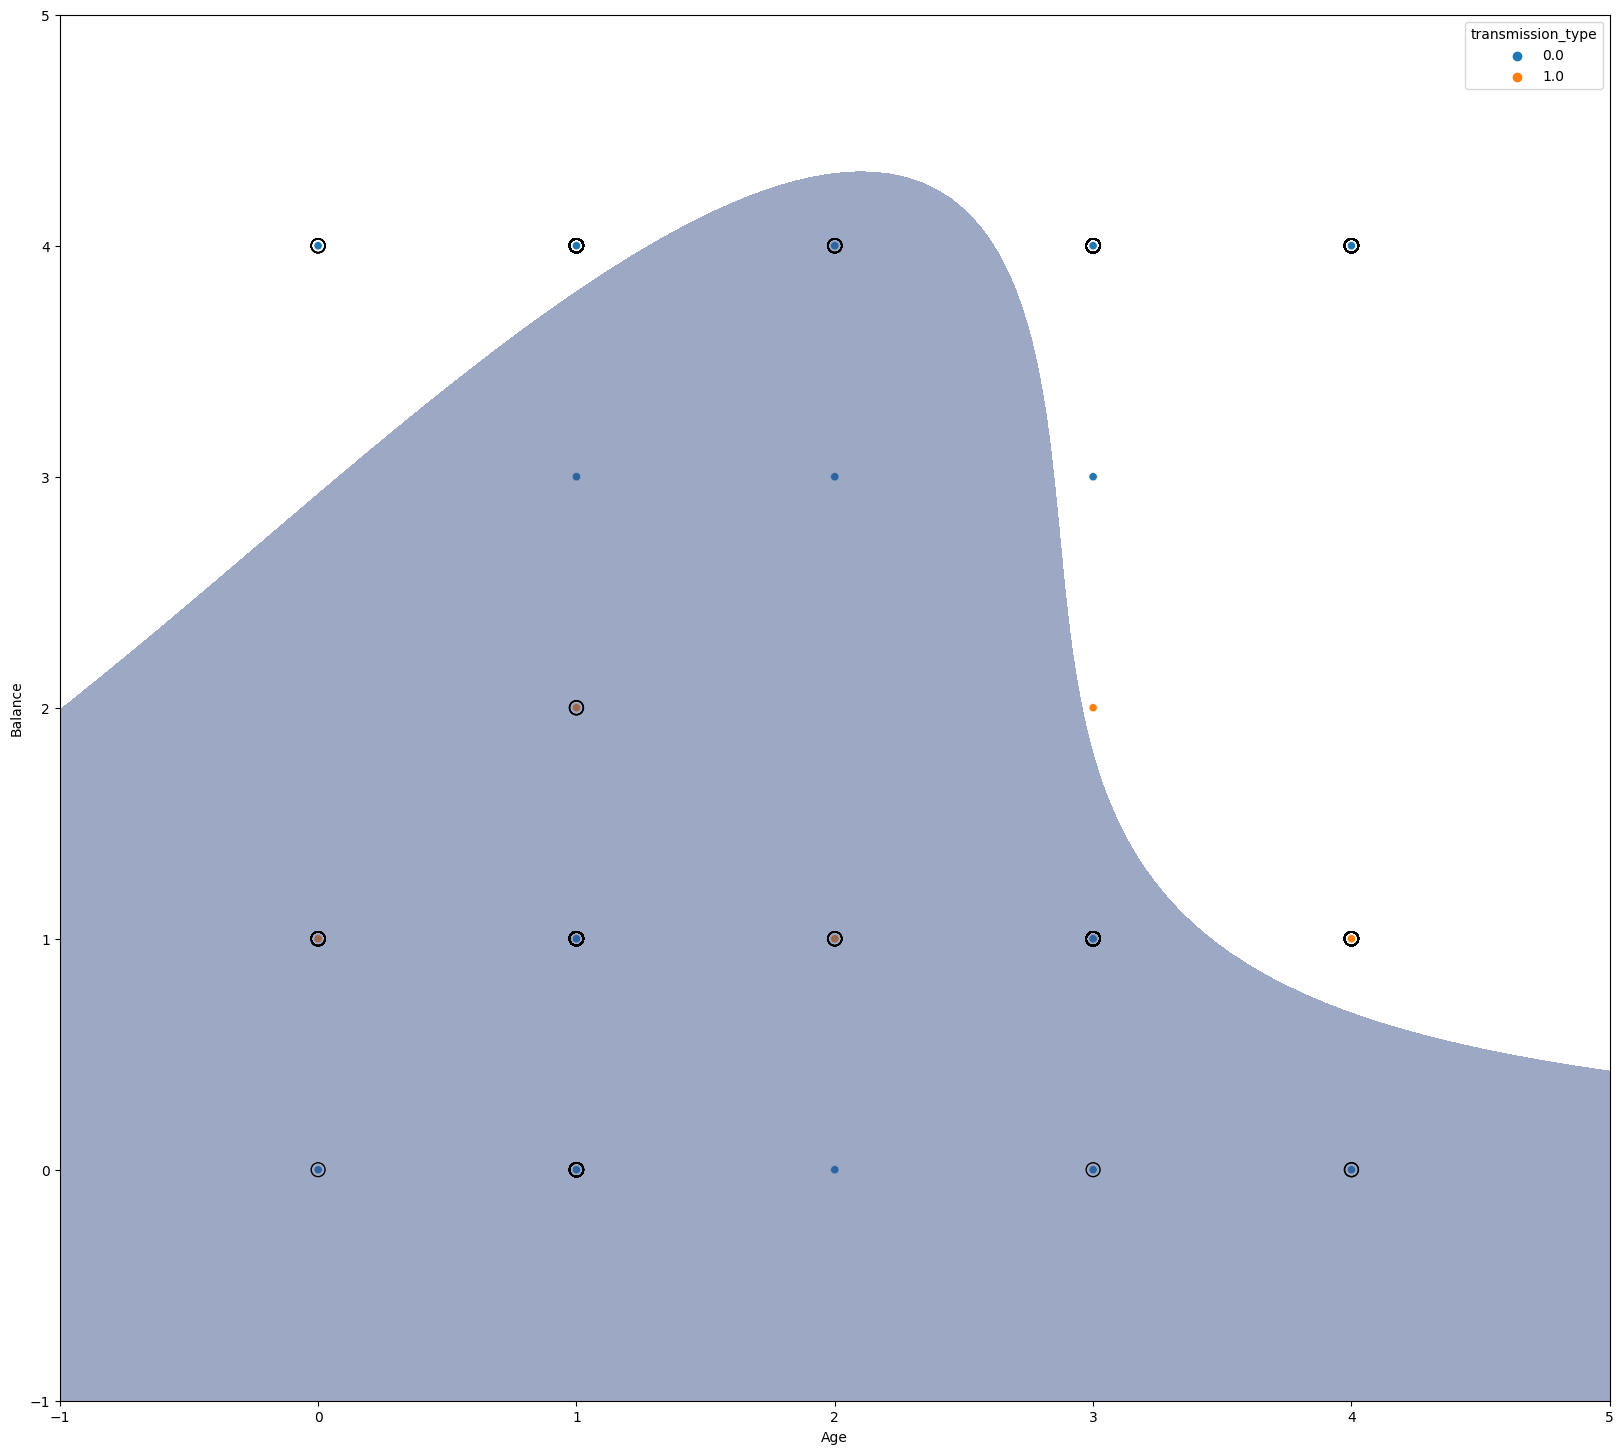

In [138]:
from sklearn.inspection import DecisionBoundaryDisplay

plt.figure(figsize=(20, 18))
sns.scatterplot(x='owner_type', y='fuel_type', hue='transmission_type', data=agsel)

ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(
    estimator=svm,
    X=X,
    plot_method="contourf",
    # colors="k", # untuk warna abu
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

ax.scatter(
    svm.support_vectors_[:, 0],
    svm.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()


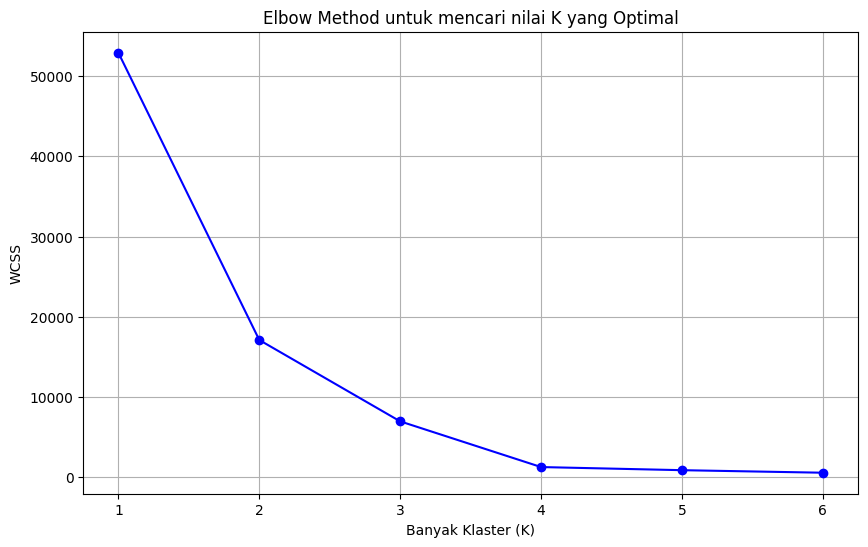

In [139]:
from sklearn.cluster import KMeans

wcss = [] # Inisialisasi list untuk menyimpan nilai WCSS tiap kelompok

# Buat loop untuk melatih algoritma K-Means
for k in range(1, 7):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

# Buat grafik Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [140]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, n_init = 'auto')

In [141]:
kmeans.fit(X)

KMeans(n_clusters=2, n_init='auto')

In [143]:
agsel['cluster'] = kmeans.labels_
centroid = kmeans.cluster_centers_

centroid

array([[1.59972814, 3.99773448],
       [1.66788258, 0.92113948]])

c:\Users\AGSEL FALANA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AGSEL FALANA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AGSEL FALANA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AGSEL FALANA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: 

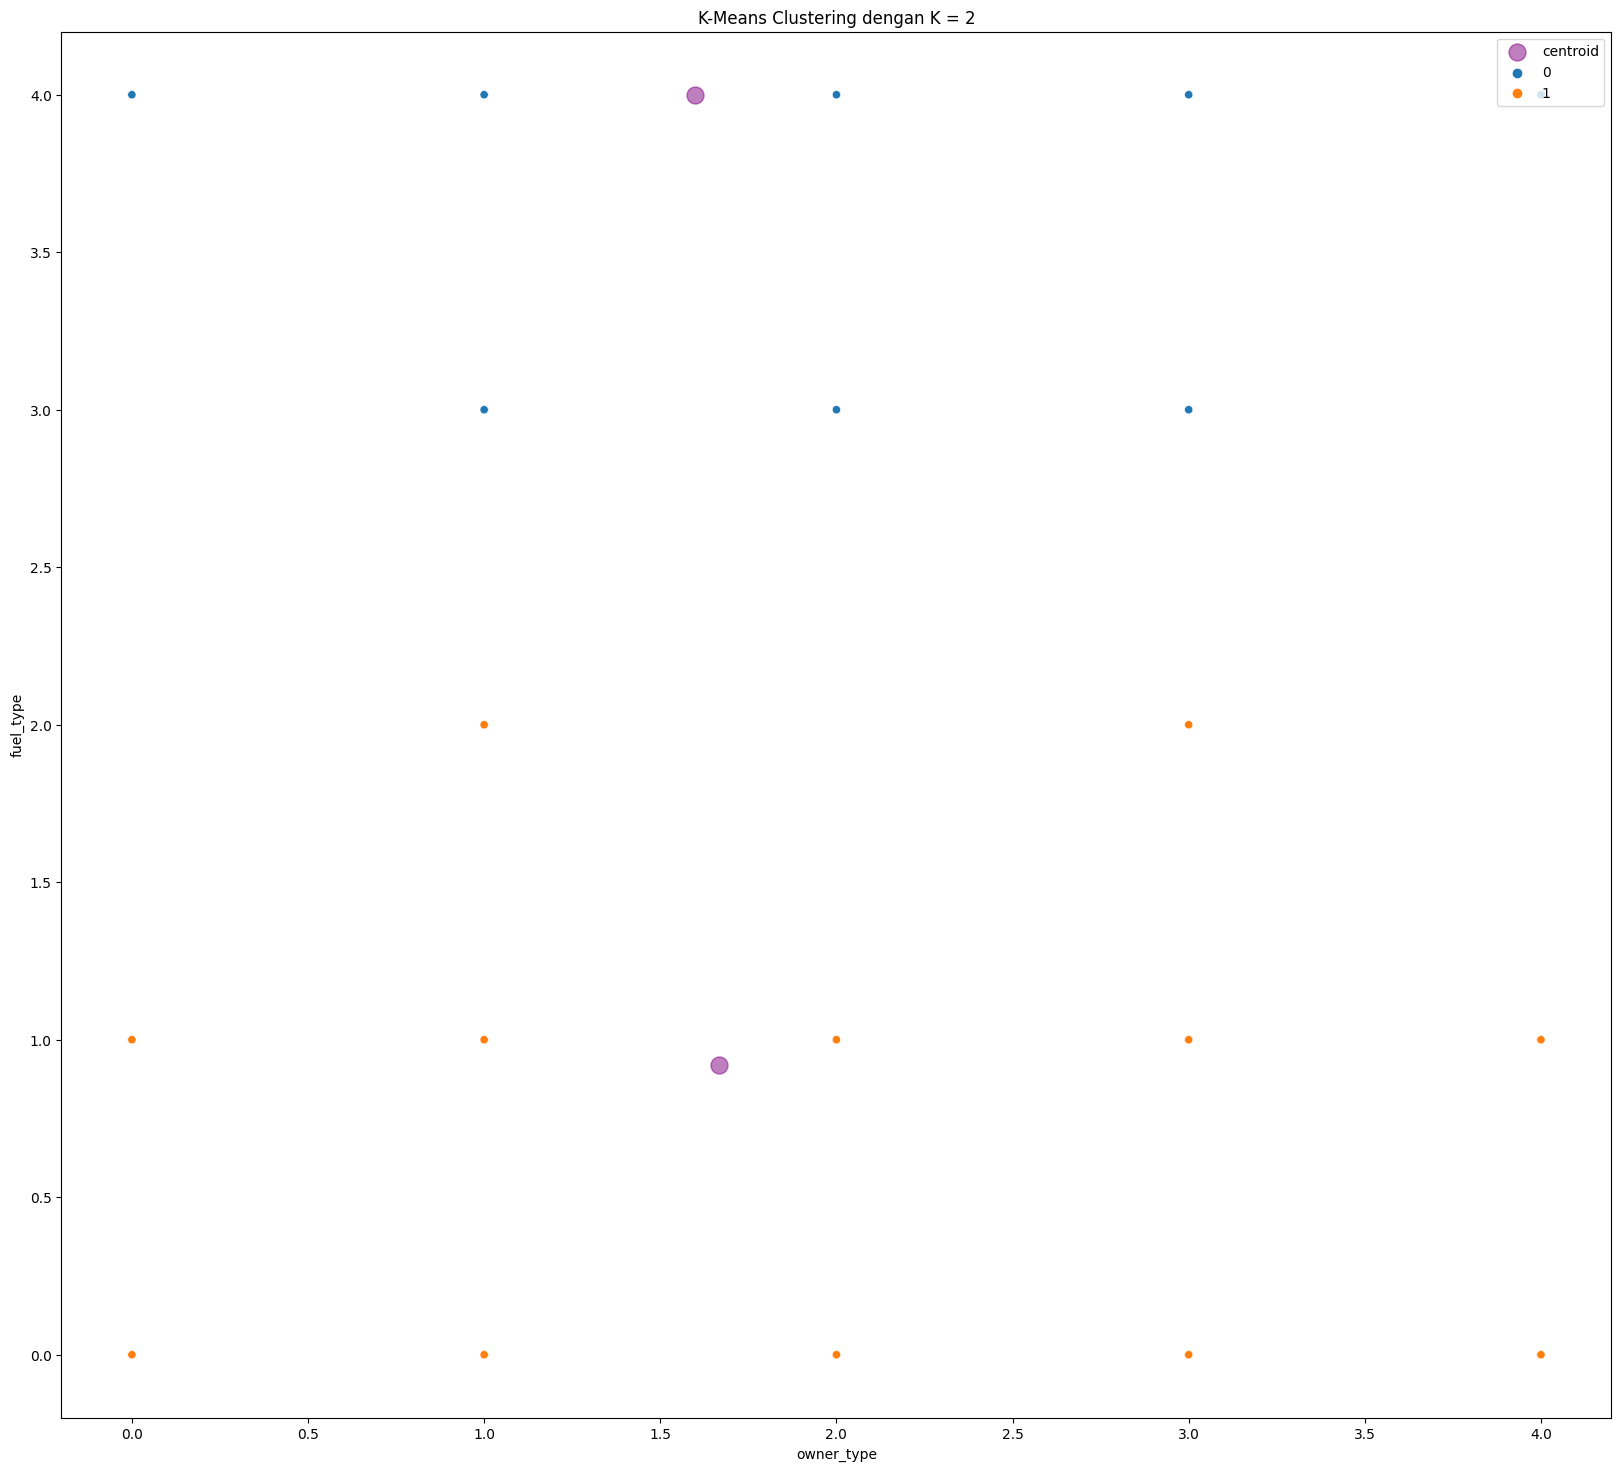

In [144]:
plt.figure(figsize = (20, 18 ))

# Data Points Pusat (Centroid)
plt.scatter(centroid[:, 0], centroid[:, 1], 
            alpha = 0.5, c = 'purple', s = 150, label = 'centroid')

# Data Points Hasil Prediksi Cluster
sns.scatterplot(data = agsel, x = 'owner_type', y = 'fuel_type',
                hue = 'cluster')
plt.title("K-Means Clustering dengan K = 2")
plt.legend(loc = 'upper right')

plt.show()


In [145]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

ss_score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {ss_score:.2f}")

db_index = davies_bouldin_score(X, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index:.2f}")

ch_index = calinski_harabasz_score(X, kmeans.labels_)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.72
Davies-Bouldin Index: 0.59
Calinski-Harabasz Index: 35184.17


In [147]:
from sklearn.metrics import adjusted_rand_score # ARI
from sklearn.metrics import normalized_mutual_info_score # NMI
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score # HCV-M

cross_tab = pd.crosstab(agsel["cluster"], agsel["transmission_type"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

ari = adjusted_rand_score(agsel["transmission_type"], kmeans.labels_)
print(f"Adjusted Rand Index (ARI)           : {ari:.2f}")

true_labels_num = agsel["transmission_type"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, kmeans.labels_)
print(f"Normalized Mutual Information (NMI) : {nmi:.2f}")

homogeneity = homogeneity_score(agsel["transmission_type"], kmeans.labels_)
completeness = completeness_score(agsel["transmission_type"], kmeans.labels_)
v_measure = v_measure_score(agsel["transmission_type"], kmeans.labels_)
print(f"Homogeneity Score                   : {homogeneity:.2f}")
print(f"Completeness Score                  : {completeness:.2f}")
print(f"V-Measure Score                     : {v_measure:.2f}")

Cross-Tabulation:
transmission_type   0.0   1.0
cluster                      
0                  8244  2791
1                  3951  1806 

Adjusted Rand Index (ARI)           : 0.02
Normalized Mutual Information (NMI) : 0.00
Homogeneity Score                   : 0.00
Completeness Score                  : 0.00
V-Measure Score                     : 0.00


c:\Users\AGSEL FALANA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AGSEL FALANA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AGSEL FALANA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AGSEL FALANA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: 

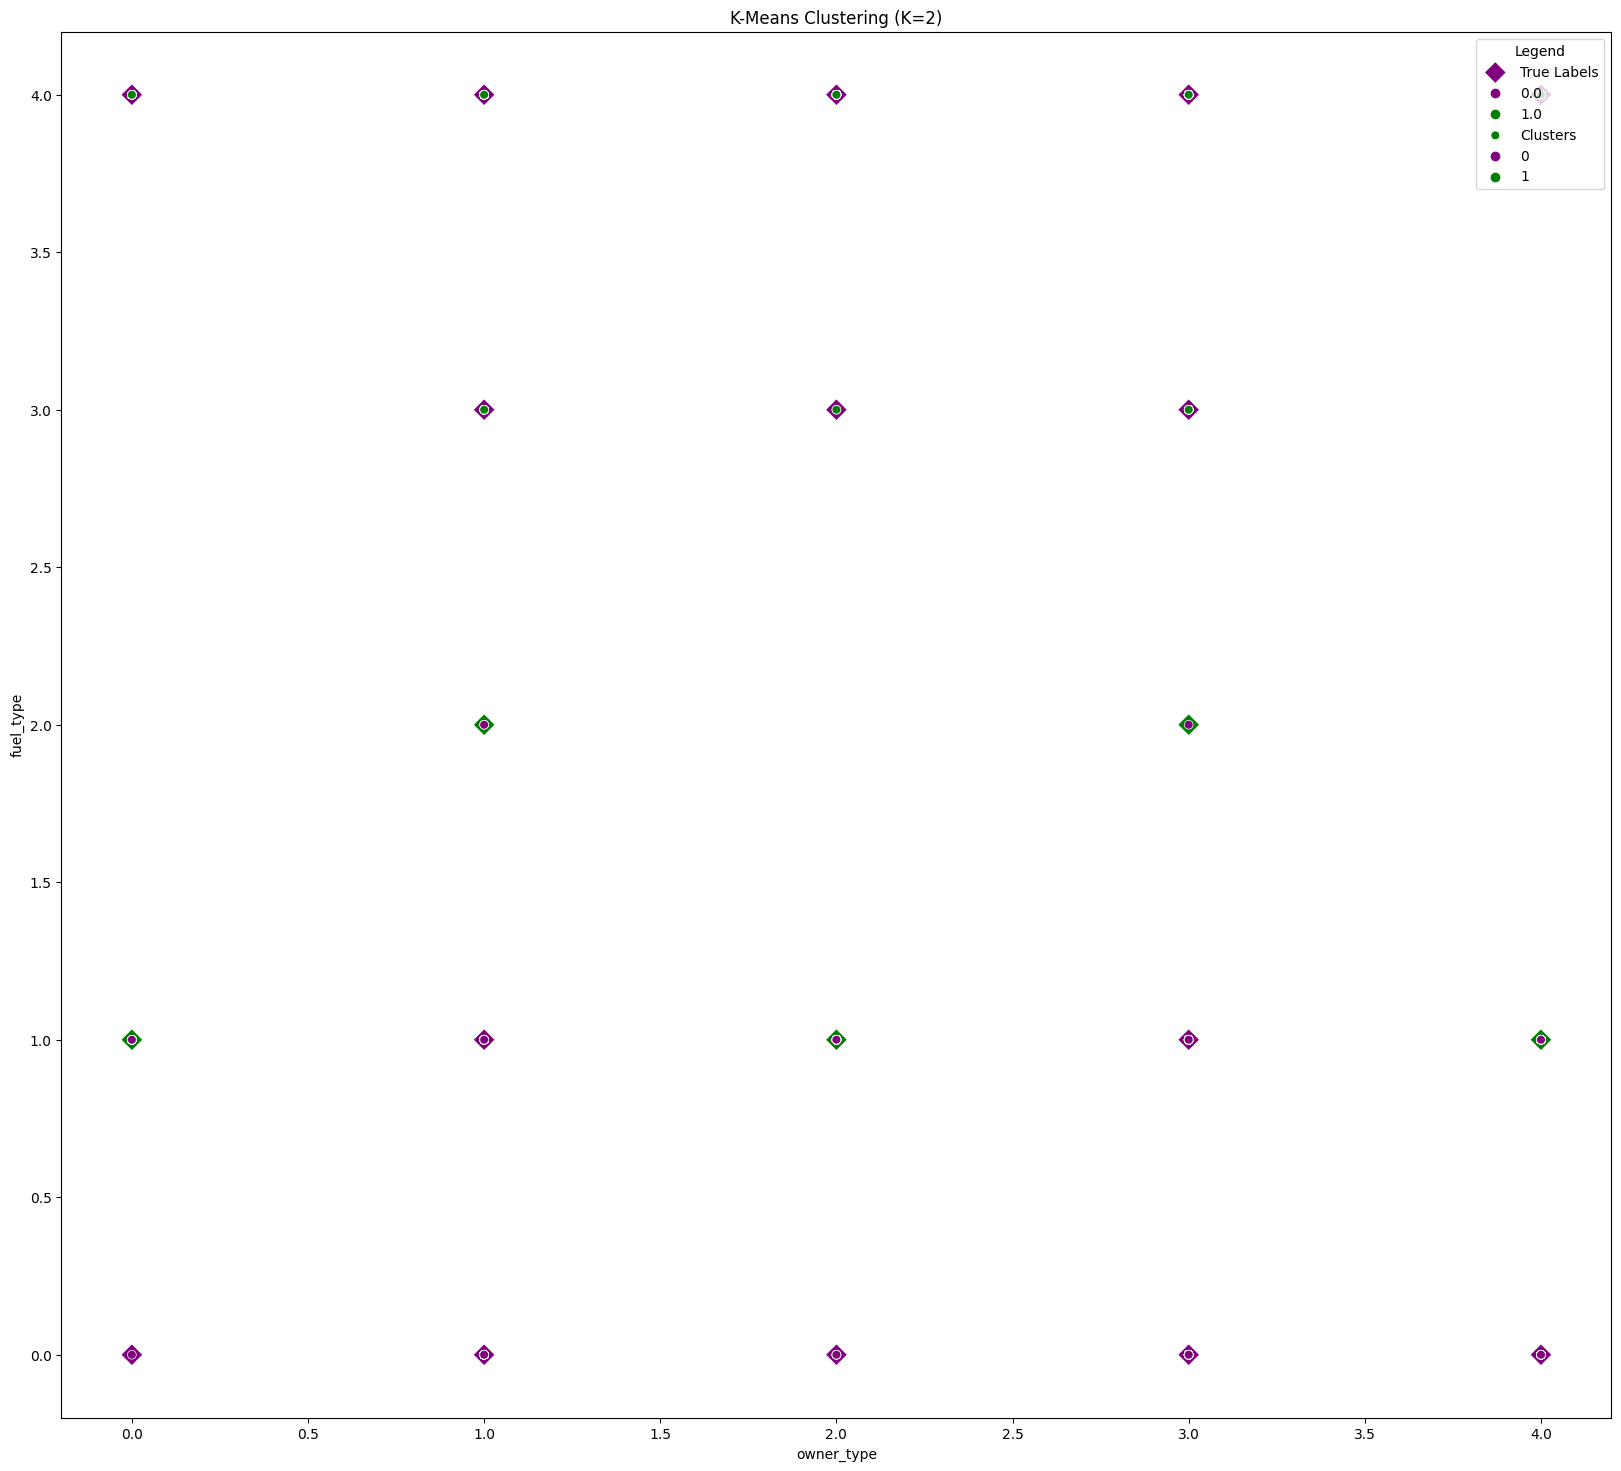

In [151]:
cluster_mapping = {0: 1, 1: 0, 2: 2} # 0 jadi 1; 1 jadi 0; 2 tetap 2

# Buat kolom baru agar tidak mengganggu kolom hasil prediksi
agsel["cluster2"] = agsel["cluster"].map(cluster_mapping)

# Buat sebuah scatter plot untuk data-points label aslinya
plt.figure(figsize=(20,18))
warna = ["purple", "green", "black"]
sns.scatterplot(agsel, x="owner_type", y="fuel_type", palette=warna,
hue="transmission_type", marker="D", s=130, label="True Labels")

# Tindih data-points tersebut dengan hasil prediksinya
sns.scatterplot(agsel, x="owner_type", y="fuel_type", palette=warna,
hue="cluster2", marker="o", s=40, label="Clusters")

plt.title("K-Means Clustering (K=2)")
plt.legend(title="Legend", loc="upper right")
plt.show()